In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A=np.array([[5, 3, 0, 1],
           [4, 0, 0, 1],
           [1, 1, 0, 5],
           [1, 0, 0, 4],
           [0, 1, 5, 4]])

n,m=A.shape
k=2

In [ ]:
A

In [3]:
X=tf.placeholder(dtype=tf.float32,shape=[n,m])

In [4]:
P=tf.Variable(tf.truncated_normal([n,k]))
Q=tf.Variable(tf.truncated_normal([m,k]))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
b=tf.Variable(tf.zeros([1]))
p=tf.Variable(tf.zeros([n,1]))
q=tf.Variable(tf.zeros([m,1]))

In [6]:
X_= b + tf.matmul(P+p, tf.transpose(Q+q))
indices=tf.where(tf.not_equal(X,0))
loss=tf.reduce_mean((tf.gather_nd(X,indices)-tf.gather_nd(X_,indices))**2)

In [27]:
train_step_grad=tf.train.GradientDescentOptimizer(0.005).minimize(loss)
train_step_adam=tf.train.AdamOptimizer(0.01).minimize(loss)

In [28]:
init=tf.global_variables_initializer()

[[4.991579   2.6252801  3.5680945  0.90534604]
 [3.7413354  2.3774774  2.8922043  1.314647  ]
 [1.1915444  0.7285781  2.6592083  4.746199  ]
 [0.887447   0.9302764  2.2324007  4.250846  ]
 [5.0102267  1.2360251  4.973461   4.062477  ]] {<tf.Tensor 'Placeholder:0' shape=(5, 4) dtype=float32>: array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])}


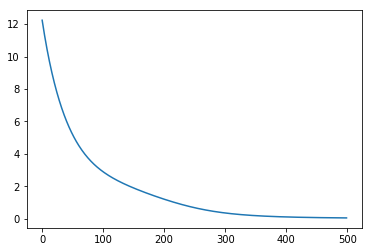

In [30]:
sess=tf.Session()
sess.run(init)
scores=[]
for _ in range(500):
    sess.run(train_step_grad, {X:A})
    scores.append(sess.run(loss, {X:A}))
print(sess.run(tf.matmul(P+p,tf.transpose(Q+q))+b), {X:A})
sess.close()
plt.plot(scores)

In [31]:
print(scores[-1])

0.048156675


[[5.1783304 2.915316  2.0778775 1.0099732]
 [3.6275592 2.1892202 1.3950531 0.7564322]
 [1.0038707 0.8294477 5.774606  4.924805 ]
 [0.9672781 0.8399783 4.592527  3.9503436]
 [1.767435  1.2139004 4.975371  4.1065183]] {<tf.Tensor 'Placeholder:0' shape=(5, 4) dtype=float32>: array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])}


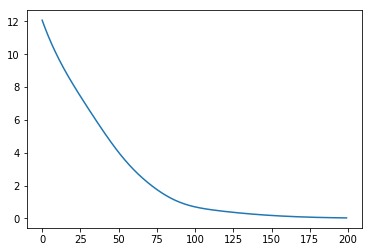

In [29]:
sess=tf.Session()
sess.run(init)
scores=[]
for _ in range(200):
    sess.run(train_step_adam, {X:A})
    scores.append(sess.run(loss, {X:A}))
print(sess.run(tf.matmul(P+p,tf.transpose(Q+q))+b), {X:A})
sess.close()
plt.plot(scores)

In [32]:
scores[-1]

0.048156675

In [11]:
A

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])